In [1]:
import numpy as np, os, sys, subprocess
import matplotlib.pyplot as plt

In [2]:
# write sbatch text given hyper parameters 
def write_sbatch(name, batch_size, lag_time, n_sm, n_epochs, n_feat, n_plot, n_traj, reversible, trim_start, trim_end, prefix):

    #populate run_line with hyperparams
    run_line =  ('python run_single_to_pkl.py' +
                ' --name ' + name + 
                ' --prefix ' + prefix + 
                ' --batch_size ' + str(batch_size) + 
                ' --lag_time ' + str(lag_time) +
                ' --n_sm ' + str(n_sm) +
                ' --n_epochs ' + str(n_epochs) +
                ' --n_feat ' + str(n_feat) +
                ' --n_plot ' + str(n_plot) +
                ' --n_traj ' + str(n_traj) +
                ' --reversible ' + str(reversible) + 
                ' --trim_start ' + str(trim_start) +
                ' --trim_end ' + str(trim_end))

    sbatch_text = '''#!/bin/bash

#SBATCH --mail-type=ALL
#SBATCH --mail-user=mikejones@uchicago.edu

#SBATCH --job-name=''' + prefix + '''

#SBATCH --output=''' + prefix + '''.out
##SBATCH --partition=gm4-pmext
#SBATCH --partition=broadwl
#SBATCH --nodes=1 # SET NUM NODES 
#SBATCH --ntasks-per-node=1 # SETS NUM MPI RANKS
#SBATCH --cpus-per-task=1 # SET NUM THREADS (cores)
#SBATCH --mem=10GB # REQUEST MEMORY
##SBATCH --constraint=gold-6248
##SBATCH --qos=gm4-cpu

'''
 
    sbatch_final = sbatch_text + run_line
    return sbatch_final

In [3]:
## write and run sbatch

def run_sbatch(name, prefix, sbatch_final):
    filename = prefix + name.replace('npy', 'sbatch')
    file = open(filename,"w+")

    file.write(sbatch_final)
    file.close()

    subprocess.call(['sbatch', filename])
    print ('ran ' + filename)


In [4]:
## set hyperparameters
cut4_list = ['comb_cut4_training_AT-all_567-10000-190.npy',
            'comb_cut4_training_GC-end_350-10000-190.npy',
            'comb_cut4_training_GC-mid_230-10000-190.npy',
            'comb_cut4_training_GC-core_166-10000-190.npy']

lowT_cut4_list = ['mdtraj-pwdr-4e7_cut4_AT-all_293K-346-10000-190.npy',
                 'mdtraj-pwdr-4e7_cut4_GC-end_300K-202-10000-190.npy',
                 'mdtraj-pwdr-4e7_cut4_GC-mid_309K-127-10000-190.npy',
                 'mdtraj-pwdr-4e7_cut4_GC-core_310K-80-10000-190.npy']
          
Equ_list = ['mdtraj-pwdr-allseq_15ts_15e+09run_AT-all_308K-10-150001-190.npy',
             'mdtraj-pwdr-allseq_15ts_15e+09run_GC-end_315K-10-150001-190.npy',
             'mdtraj-pwdr-allseq_15ts_15e+09run_GC-mid_324K-10-150001-190.npy'
             'mdtraj-pwdr-allseq_15ts_15e+09run_GC-core_325K-10-150001-190.npy',
            ]

#n_epochs_list = [(i +1)*10 for i in range(9)]
n_epochs_list = [30]

name_list = cut4_list
batch_size = 50000    ## training batch size
lag_time = 32         ## lag time
n_sm = 6              ## number of SRV slow modes
n_feat = 190          ## number of features of per frames      
n_plot = 5000         ## number of data points to save for plotting
n_traj = 150        ## subset of trajectories to train on (for consistency between sequences)
reversible = False    ## determines SRV vs SnRV

trim_size_list = [400, 1000, 10000]   ## trim size around center event
full_size = 10000                     ## total number of frames per traj

for name in name_list:
    for n_epochs in n_epochs_list:
        for trim_size in trim_size_list:
         
            trim_start = full_size//2 - trim_size//2
            trim_end = full_size//2 + trim_size//2
            
            prefix = 'trim_{}_lag_{}_sm_{}_ep_{}'.format(trim_size, lag_time, n_sm, n_epochs)
            sbatch_final = write_sbatch(name, batch_size, lag_time, n_sm, n_epochs, n_feat, n_plot, n_traj, reversible, trim_start, trim_end,  prefix)
            run_sbatch(name, prefix, sbatch_final)

ran trim_400_lag_32_sm_6_ep_30comb_cut4_training_AT-all_567-10000-190.sbatch
ran trim_1000_lag_32_sm_6_ep_30comb_cut4_training_AT-all_567-10000-190.sbatch
ran trim_10000_lag_32_sm_6_ep_30comb_cut4_training_AT-all_567-10000-190.sbatch
ran trim_400_lag_32_sm_6_ep_30comb_cut4_training_GC-end_350-10000-190.sbatch
ran trim_1000_lag_32_sm_6_ep_30comb_cut4_training_GC-end_350-10000-190.sbatch
ran trim_10000_lag_32_sm_6_ep_30comb_cut4_training_GC-end_350-10000-190.sbatch
ran trim_400_lag_32_sm_6_ep_30comb_cut4_training_GC-mid_230-10000-190.sbatch
ran trim_1000_lag_32_sm_6_ep_30comb_cut4_training_GC-mid_230-10000-190.sbatch
ran trim_10000_lag_32_sm_6_ep_30comb_cut4_training_GC-mid_230-10000-190.sbatch
ran trim_400_lag_32_sm_6_ep_30comb_cut4_training_GC-core_166-10000-190.sbatch
ran trim_1000_lag_32_sm_6_ep_30comb_cut4_training_GC-core_166-10000-190.sbatch
ran trim_10000_lag_32_sm_6_ep_30comb_cut4_training_GC-core_166-10000-190.sbatch


(array([169]),)
177477.47747747749


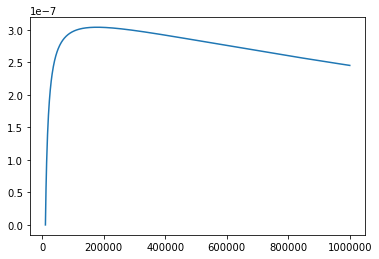

In [6]:
## test plots

x = np.linspace(10000, 1000000, 1000)

t = 10000
p = 0.95
p_l = 75000
a = 2

def efficiency(x):
    
    eff = ((1 - t/x)*(1-p**(x/p_l)))/(a*x)
    return eff
    
plt.plot(x, efficiency(x))

print(np.where(efficiency(x) == np.amax(efficiency(x))))
print(x[169])